In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/training_final_latcorr.csv')

In [3]:
pd.set_option('display.max_columns', None)
df

,field_1,Name,Longitude,Latitude,CO2 (mg C m¯² d¯¹),CH4 (mg C m-2 d-1),CO2 (g/kWh),CH4 (g/kWh),Area / Electricity,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,temp_spring_avg_lc,temp_spring_avg,temp_summer_avg_lc,temp_summer_avg,temp_fall_avg_lc,temp_fall_avg,temp_winter_avg_lc,temp_winter_avg,NDVI_annual_avg,NDVI_spring_avg_lc,NDVI_spring_avg,NDVI_summer_avg_lc,NDVI_summer_avg,NDVI_fall_avg_lc,NDVI_fall_avg,NDVI_winter_avg_lc,NDVI_winter_avg,npp_annual_avg,npp_spring_avg_lc,npp_spring_avg,npp_summer_avg_lc,npp_summer_avg,npp_fall_avg_lc,npp_fall_avg,npp_winter_avg_lc,npp_winter_avg,erosion
0,116,Segredo,-52.100000,-25.783333,600.0,29.9,15.167696,0.274857,0.018889,82.0,13.0,3.0,27.333333,48.768551,17.059999,18.243999,17.054667,20.768000,13.137333,17.054667,18.243999,13.137333,20.768000,200.666672,212.666672,221.333328,238.666672,219.333328,221.333328,212.666672,219.333328,238.666672,200.500000,212.000000,207.666672,202.000000,180.333328,207.666672,212.000000,180.333328,202.000000,21.503389
1,117,Segredo,-52.100000,-25.783333,1306.1,5.0,33.017545,0.045963,0.018889,82.0,13.0,3.0,27.333333,48.768551,17.059999,18.243999,17.054667,20.768000,13.137333,17.054667,18.243999,13.137333,20.768000,200.666672,212.666672,221.333328,238.666672,219.333328,221.333328,212.666672,219.333328,238.666672,200.500000,212.000000,207.666672,202.000000,180.333328,207.666672,212.000000,180.333328,202.000000,21.503389
2,45,Itaipu,-54.550000,-25.383333,328.6,NaN,6.603175,NaN,0.015015,1350.0,14.0,129.0,10.465116,44.606594,21.125334,21.429333,21.202667,25.158667,16.773333,21.202667,21.429333,16.773333,25.158667,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,87.000000,79.000000,85.333336,87.000000,96.666664,85.333336,79.000000,96.666664,87.000000,32.145058
3,104,RibeirÃ£o das Lages,-43.883333,-22.700000,22.1,NaN,NaN,NaN,NaN,30.0,95.0,0.5,60.000000,60.257137,20.374001,20.393333,20.902666,23.022667,17.549334,20.902666,20.393333,17.549334,23.022667,232.333328,226.000000,242.333328,237.666672,223.333328,242.333328,226.000000,223.333328,237.666672,151.416672,153.333328,179.333328,156.666672,170.666672,179.333328,153.333328,170.666672,156.666672,0.541019
4,7,Barra Bonita,-48.583333,-22.516667,1036.4,9.9,3187.260766,11.071149,2.297872,324.0,42.0,4.0,81.000000,37.520664,20.853001,21.605333,20.834667,23.501333,17.721333,20.834667,21.605333,17.721333,23.501333,160.250000,123.666664,178.333328,187.333328,151.666672,178.333328,123.666664,151.666672,187.333328,132.750000,94.000000,166.000000,130.000000,141.000000,166.000000,94.000000,141.000000,130.000000,7.974369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,68,Lule,21.666667,65.833333,12.3,NaN,20.541089,NaN,1.247826,574.0,70.0,NaN,NaN,61.908791,1.616667,0.884000,0.884000,14.160000,14.160000,1.786667,1.786667,-10.181334,-10.181334,131.750000,106.333336,106.333336,226.000000,226.000000,159.333328,159.333328,35.333332,35.333332,99.250000,58.333332,58.333332,180.333328,180.333328,51.333332,51.333332,107.000000,107.000000,0.004779
150,66,Lokka,27.733333,67.816667,545.5,79.0,632.052667,33.285333,0.865753,316.0,28.0,2.1,150.476191,60.026501,-1.679333,-3.041333,-3.041333,11.264000,11.264000,-1.165333,-1.165333,-13.594666,-13.594666,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,95.583336,47.666668,47.666668,114.000000,114.000000,39.666668,39.666668,181.000000,181.000000,0.001489
151,67,Lokka,27.733333,67.816667,288.0,115.0,333.696000,48.453333,0.865753,316.0,28.0,2.1,150.476191,60.026501,-1.679333,-3.041333,-3.041333,11.264000,11.264000,-1.165333,-1.165333,-13.594666,-13.594666,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,95.583336,47.666668,47.666668,114.000000,114.000000,39.666668,39.666668,181.000000,181.000000,0.001489
152

In [4]:
# drop columns we're not using
df['kWh'] = df['Area_km2'] / df['Area / Electricity']
df = df.drop(['Longitude', 'CO2 (g/kWh)', 'CH4 (g/kWh)', 'Area / Electricity', 'Name', 'field_1',
              'temp_spring_avg', 'temp_summer_avg', 'temp_fall_avg', 'temp_winter_avg', 
              'NDVI_spring_avg', 'NDVI_summer_avg', 'NDVI_fall_avg', 'NDVI_winter_avg', 
              'npp_spring_avg' , 'npp_summer_avg' , 'npp_fall_avg' , 'npp_winter_avg'], axis=1)

In [5]:
# rename CO2 and CH4 columns
df.rename(columns = {'CH4 (mg C m-2 d-1)':'CH4', 'CO2 (mg C m¯² d¯¹)':'CO2'}, inplace = True) 

In [6]:
ch4 = df.drop(['CO2'], axis=1)
ch4 = ch4[ch4['CH4'].notna()]

In [7]:
ch4.shape

(98, 24)

In [8]:
for column in ch4:
    print(column, ':',  ch4[column].isna().sum())

Latitude : 0
CH4 : 0
Area_km2 : 2
Age : 1
Volume_km3 : 7
Areakm2_div_Volkm3 : 8
org_c : 2
temp_annual_avg : 0
temp_spring_avg_lc : 0
temp_summer_avg_lc : 0
temp_fall_avg_lc : 0
temp_winter_avg_lc : 0
NDVI_annual_avg : 0
NDVI_spring_avg_lc : 0
NDVI_summer_avg_lc : 0
NDVI_fall_avg_lc : 0
NDVI_winter_avg_lc : 0
npp_annual_avg : 0
npp_spring_avg_lc : 0
npp_summer_avg_lc : 0
npp_fall_avg_lc : 0
npp_winter_avg_lc : 0
erosion : 0
kWh : 16


In [9]:
from sklearn.impute import KNNImputer
model_impute = KNNImputer(n_neighbors=int(np.sqrt(ch4.shape[0])))
ch4_imputed = model_impute.fit_transform(ch4)

In [10]:
ch4_imputed = pd.DataFrame(columns=ch4.columns, data=ch4_imputed)

In [11]:
for column in ch4_imputed:
    print(column, ':',  ch4_imputed[column].isna().sum())

Latitude : 0
CH4 : 0
Area_km2 : 0
Age : 0
Volume_km3 : 0
Areakm2_div_Volkm3 : 0
org_c : 0
temp_annual_avg : 0
temp_spring_avg_lc : 0
temp_summer_avg_lc : 0
temp_fall_avg_lc : 0
temp_winter_avg_lc : 0
NDVI_annual_avg : 0
NDVI_spring_avg_lc : 0
NDVI_summer_avg_lc : 0
NDVI_fall_avg_lc : 0
NDVI_winter_avg_lc : 0
npp_annual_avg : 0
npp_spring_avg_lc : 0
npp_summer_avg_lc : 0
npp_fall_avg_lc : 0
npp_winter_avg_lc : 0
erosion : 0
kWh : 0


## RF for CH4

In [12]:
X = ch4_imputed.drop('CH4', axis=1)
Y = ch4_imputed['CH4']

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(random_state=42, n_estimators=100, max_features=5)
randomForest.fit(x_train, y_train)
randomForest.score(x_train, y_train)

0.8731811856031952

In [15]:
print("The training error is: %.5f" % (1 - randomForest.score(x_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(x_test, y_test)))

The training error is: 0.12682
The test     error is: 0.90917


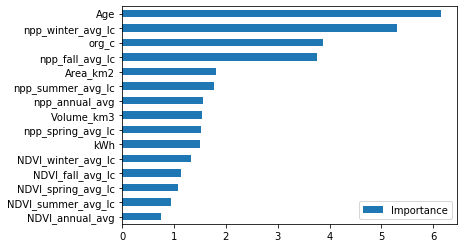

In [18]:
pd.DataFrame(index=x_train.columns, data=randomForest.feature_importances_*100, columns=['Importance']).sort_values(by='Importance', ascending=True).head(15).plot(kind='barh')
